In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.model_selection import train_test_split
from Util import loadBeerRaw,loadWine
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import FastICA
from sklearn.cluster import KMeans

X_train, X_test, y_train, y_test= loadBeerRaw()
ica = FastICA(n_components=3,
         random_state=0)
encoder = LabelEncoder()
X_train['SugarScale'] = encoder.fit_transform(X_train['SugarScale']).astype(np.int32)
icaComponents =ica.fit_transform(X_train[['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale']])
icaDf = pd.DataFrame(data = icaComponents
             , columns = ['ICA component 1', 'ICA component 2','ICA component 3'])

In [4]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(icaDf)
y_kmeans = kmeans.predict(icaDf)

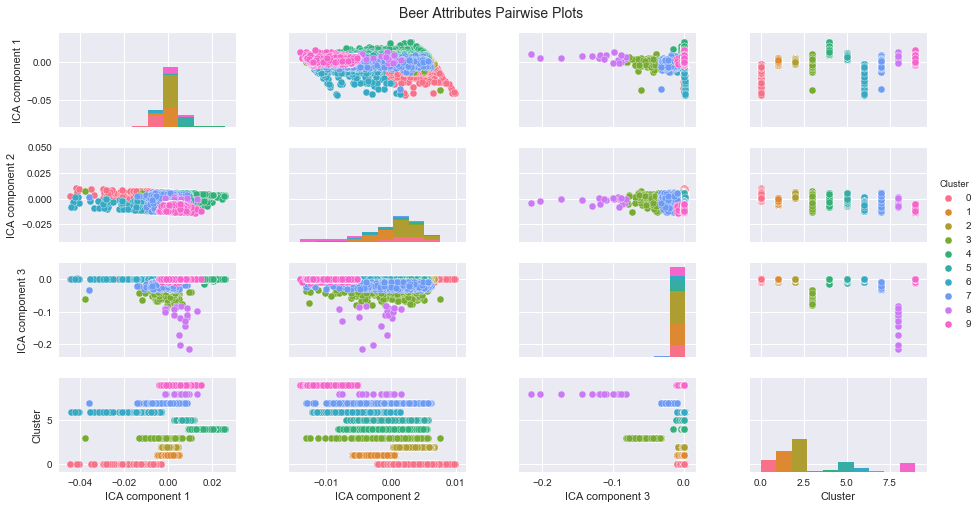

In [6]:
icaDf['Cluster'] =y_kmeans
pp = sns.pairplot(icaDf, hue='Cluster', size=1.8, aspect=1.8)
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Beer Attributes Pairwise Plots', fontsize=14)